<img src="ISIT.png" width="800">     



<img src="ic2.png" width="800">   

## <span style='background :burlywood' >Objetcifs</span>
   ######  <span style='color:black'>Maitrise de l’API de twitter pour l’extraction des tweets.</span>
   ###### <span style='color:black'>Maitrise de la partie NLP (naturallanguageprocessing) avec NLTK en Python.</span>
   ###### <span style='color:black'>Appliquer les principes de nettoyage des données.</span>
   ###### <span style='color:black'>Classer les tweets: regrouper ensemble les tweets qui sont similaire.</span>
       

###  <span style='color:blue'> Introduction :</span> 
#### <span style='color:green'> Twitter: </span>
C'est un réseau social et un microblog qui permet aux utilisateurs de publier des messages en temps réel, appelés tweets. Les tweets sont des messages courts, limités à 280 caractères. En raison de la nature de ce service de microblogging (messages rapides et courts), les gens utilisent des acronymes, commettent des erreurs d’orthographe, utilisent des émoticônes et d’autres symboles qui expriment des significations particulières.
#### <span style='color:green'> Caractéristiques d’un tweet: </span> 

###### <span style='color:red'>Mention @</span> :
se présente sous la forme @NomUtilisateur. Il cible un utilisateur de Twitter dans le tweet posté.
###### <span style='color:red'>Hashtag # </span>:
se présente sous la forme #mot-clé. Il identifie le mot-clé en question comme important et peut en faire un sujet populaire.
###### <span style='color:red'>RT (ReTweet) </span>:
se présente sous la forme RT Nom_Utilisatuer. Il permet de partager le tweet d’un utilisateur.
###### <span style='color:red'>URL (Lien) </span>: 
se présente sous la forme https :// ou http ://www. Twitter, permet à l’utilisateur de rejoindre les liens dans son tweet.





## Etape1: Extraction des données Twitter


Afin d'avoir accès aux données Twitter par programmation, nous devons créer une application qui interagit avec l'API Twitter.
La première étape est l'enregistrement de l'application. En particulier, on doit  pointer votre navigateur vers http://apps.twitter.com ,connecter à Twitter et enregistrer une nouvelle application. On choisit maintenant  un nom et une description pour l' application. On récoit une clé client et un secret consommateur: ce sont des paramètres d'application qui doivent toujours rester confidentiels. Depuis la page de configuration de l'application, On également exiger un jeton d'accès et un secret de jeton d'accès. À l'instar des clés consommateurs.
######  <span style='background :lightpink' > Une fois qu'on a configuré notre application Twitter, on se trouve prêt à accéder aux tweets Python. Commencez par importer bibliothèques nécessaires .
######  <span style='color:purple'> Importation de bibiliothèques:</span> 
 <span style='background :yellow' >Tweepy</span> est un package Python open source qui vous offre un moyen très pratique d'accéder à l'API Twitter avec Python
 ######  <span style='color:purple'> Création d' une application Twitter:</span>
Pour récupérer des tweets via l'API Twitter, j'ai accéder à au compte Twitter et j'ai créer une application, 
à partir de cette application ,j'ai obtenu "Clé consommateur", "Secret consommateur", "Jeton d'accès" et "Secret du jeton d'accès".Par la suite  on s'intèresse à l'authentification de nos clés.

######  <span style='color:green'> Accéder aux données:</span>
---> Afin d'autoriser notre application à accéder à Twitter en notre nom, nous devons utiliser l'interface OAuth:


In [95]:
import pandas as pd
import tweepy as tw
import matplotlib.pyplot as plt

%matplotlib inline

consumer_key = "U48AwY2nNBKlhRL3oLWuFOZaJ" 
consumer_secret = "MfaX5Ug3Kuo6Pj9B5UxMFgiixaPh1olB1svr1PInWZwM3ze7Zz"
access_token= "1334795371537633281-lUcmoIP2Av73dlDNnQlbwWGbNy5Mqi"
access_token_secret = "Jy5FyUq7eRjxzSPpWry7lUZFoU7hE95wf9cT9SYGsg1qm"

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True, compression=True)

 ######  <span style='color:purple'> Collection de tweets:</span> 

Ci-dessous, On utilise <span style='background :aquamarine' >.Cursor()</span>pour rechercher sur Twitter des tweets contenantdifférents  termes de recherche.En d'autres terme ,.Cursor()renvoie un objet sur lequel vous pouvez itérer ou boucler pour accéder aux données collectées.
On peut  limiter le nombre de tweets renvoyés en spécifiant un nombre dans la .items()méthode.

 <span style='background :aquamarine' >.items(10000)</span>:renverra 10000  tweets.

<img src="ic3.png" width="600">   

In [96]:
#array =[]
#tweets = tw.Cursor(api.search,q="#",lang="en",since="2020-12-13").items(10000)
#for tweet in tweets:
    #print(tweet.id,tweet.user.screen_name,tweet.created_at,tweet.text)
    #array.append([tweet.id,tweet.user.screen_name,tweet.created_at,tweet.text])
    #df_t = pd.DataFrame(array).to_csv('amal.csv',index=False,header=['ID','User','Date','Tweet'])

In [97]:
df_t = pd.read_csv('amal.csv')

In [98]:
df_t.shape

(10000, 4)

In [99]:
df_t.head()

,ID,User,Date,Tweet
0,1338243378073374720,dadarynov,2020-12-13 22:04:19,RT @MesutOzil1O88_: Need help @Arsenal? 😉❤\n#Y...
1,1338243378027384834,kaltweiher,2020-12-13 22:04:19,RT @OaklandTowel: Move Abram to linebacker and...
2,1338243378002108416,malasadasbooks,2020-12-13 22:04:19,RT @TheRealHoarse: Stacey Abrams spent years s...
3,1338243377989640192,drizzle_wiener,2020-12-13 22:04:19,@Carolreboot @SL329TsMomA @deadeyebrakeman I k...
4,1338243377901481984,sznbnsl,2020-12-13 22:04:19,one person followed me // automatically checke...



## Etape2: Prétraitement des tweets

##### Dans cette phase , on s'intèresse sur le nettoyage de données (nettoyer les données de la colonne Tweets). 
<span style='color:black'> Au départ, il faut  analyser les tweets et supprimer  le texte inutile des tweets tels que: Les poignées Twitter sont déjà masquées comme @user en raison de problèmes de confidentialité. Ainsi, ces poignées Twitter ne donnent pratiquement aucune information sur la nature du tweet.</span>

<span style='color:purple'> On peut aussi penser à se débarrasser des ponctuations, des chiffres et même des caractères spéciaux puisqu'ils n'aideraient pas à différencier les différents types de tweets.J'ai essayé égalemnt de suprimmer les émojis,les les url et RT</span> 



In [100]:

import re
from string import punctuation 


In [101]:
# "cleans" the text by removing hyperlinks, hashtags, mentions, and retweets
# This function was suggested here: https://medium.com/better-programming/twitter-sentiment-analysis-15d8892c0082
import string
def cleanText(text):
    text = text.lower() # Makes text lowercase
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('https?:\/\/\S+', '', text) # Removes hyperlinks
    text = re.sub('#', '', text) # Removes hashtags
    text = re.sub('@[A-Za-z0–9]+', '', text) # Removes mentions (@)
    text = re.sub('RT[\s]+', '', text) # Removes "RT"
    text = re.sub('rt[\s]+', '', text) # Removes "RT"
    text = re.sub('[0-9]+', '', text)
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = re.sub(emoji_pattern, '', text)
    return text

## Etape3:Traitement des tweets: NLP (Natural LanguageProcessing)

###### <span style='color:red'> Qu'est-ce que la NLP? </span>
##### <span style='color:black'> Natural Language Processing(NLP): </span>
fait partie de l'informatique et de l'intelligence artificielle qui traite des langues humaines.
la NLP est un composant de l'exploration de texte qui effectue un type spécial d'analyse linguistique qui aide essentiellement  une machine à «lire» le texte . Il utilise une méthodologie différente pour <span style='color:green'> déchiffrer les ambiguïtés dans le langage humain.</span>

----><span style='color:blue'>Tout d'abord, nous devons installer la bibliothèque NLTK qui est la boîte à outils en langage naturel

In [55]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords') 
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### <span style='color:green'>Terminologies en NLP:</span>

<span style='background :yellow' >Tokenisation:</span> est un package Python open source qui vous offre un moyen très pratique d'accéder à l'API Twitter avec Python La tokenisation est la première étape de la NLP. C'est le processus de rupture de chaînes en jetons qui sont à leur tour de petites structures ou unités. 
Autrement dit;Cette tâche consiste essentiellement à diviser le texte qui a été lu en des structures de base pour l'analyse future. Ces structures peuvent être des mots (monogrammes), des ensembles de deux ou plusieurs mots adjacents (bigrammes ou ngrammes), des phrases ou des déclarations, des symboles ou une autre structure de base offrant une information utile pour le classement. Le résultat est une liste de « tokens », correspondant aux mots, bigrammes, etc., séparés par des caractères d'espace simple.
#### <span style='color:blue'>Stop Words:</span>
Lorsque on travaille sur des problèmes de traitement du langage naturel, il est important de réaliser que le processus ne doit pas consacrer ses efforts à traiter des mots tels que «le», «est», «là», etc. Ces mots sont connus comme des mots vides. Si les mots vides ne sont pas programmés pour être ignorés / supprimés.
<span style='color:blue'>Le package NLTK contient un package distinct de mots vides qui peuvent être téléchargés. NLTK a des mots vides en 16 langues qui peuvent être téléchargés et utilisés. Une fois téléchargé, il peut être passé comme argument lui indiquant d'ignorer ces mots.</span>
--> Il existe certains mots, appelées fonctionnels(de mots fonctionnels (stop words)), qui apparaissent trop fréquemment dans tout type de texte. Cette particularité fait en sorte que leur présence n'apporte aucune information utile pour le classement du texte. La présence de ces mots peut, au contraire, produire du bruit qui affecte les performances du système. C'est la raison pour laquelle il est préférable de supprimer ces mots pour ainsi améliorer la capacité de classement du modèle qui sera postérieurement utilisé. Ce type de mots inclut les connecteurs, les conjonctions, les causes déterminantes, ainsi que des verbes.
    
    

#### <span style='color:orange'>-----> Affichage  de la liste de tous les mots vides anglais pris en charge par NLTK</span>

In [56]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

##### <span style='color:red'>On passe maintenant à tokeniser tous les tweets nettoyés de notre ensemble de données et suprimer les stopwords</span>

In [57]:
new_stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])

In [58]:
def convertToList(text):
    text = word_tokenize(text)
    return [word for word in text if word not in new_stopwords] # Source for this line: https://towardsdatascience.com/creating-the-twitter-sentiment-analysis-program-in-python-with-naive-bayes-classification-672e5589a7ed

In [73]:
 # Source for this line: https://towardsdatascience.com/creating-the-twitter-sentiment-analysis-program-in-python-with-naive-bayes-classification-672e5589a7ed# Applys cleanText() to every Tweet in dataframe
df_t["Tweet"] = df_t["Tweet"].apply(cleanText)
df_t["Tweet_tokans"] = df_t["Tweet"].apply(convertToList)


In [60]:
df_t.head()

,ID,User,Date,Tweet,Tweet_tokans
0,1338243378073374720,dadarynov,2020-12-13 22:04:19,mesutozilo need help arsenal \nyagunnersya,"[mesutozilo, need, help, arsenal, yagunnersya]"
1,1338243378027384834,kaltweiher,2020-12-13 22:04:19,oaklandtowel move abram to linebacker and brin...,"[oaklandtowel, move, abram, linebacker, bring,..."
2,1338243378002108416,malasadasbooks,2020-12-13 22:04:19,therealhoarse stacey abrams spent years saying...,"[therealhoarse, stacey, abrams, spent, years, ..."
3,1338243377989640192,drizzle_wiener,2020-12-13 22:04:19,carolreboot sltsmoma deadeyebrakeman i know at...,"[carolreboot, sltsmoma, deadeyebrakeman, know,..."
4,1338243377901481984,sznbnsl,2020-12-13 22:04:19,one person followed me automatically checked ...,"[one, person, followed, automatically, checked..."


In [61]:
df_t["Tweet_tokans"].head()

0       [mesutozilo, need, help, arsenal, yagunnersya]
1    [oaklandtowel, move, abram, linebacker, bring,...
2    [therealhoarse, stacey, abrams, spent, years, ...
3    [carolreboot, sltsmoma, deadeyebrakeman, know,...
4    [one, person, followed, automatically, checked...
Name: Tweet_tokans, dtype: object

#### <span style='background :magenta' > Stemming: </span> c'est le processus de réduction de l'inflexion des mots à leur forme racine, comme le mappage d'un groupe de mots sur la même racine, même si la racine elle-même n'est pas un mot valide dans la langue.
<span style='background :pink'  >  - --> Le stemming est un processus basé sur des règles de suppression des suffixes («ing», «ly», «es», «s», etc.) d'un mot </span>

In [62]:

import nltk
ps = nltk.PorterStemmer()

def stemming (text):
    text = [ps.stem(word) for word in text]
    return text

df_t["Tweet_Stemmed"] = df_t["Tweet_tokans"].apply(lambda x: stemming(x))
df_t.head()
    

,ID,User,Date,Tweet,Tweet_tokans,Tweet_Stemmed
0,1338243378073374720,dadarynov,2020-12-13 22:04:19,mesutozilo need help arsenal \nyagunnersya,"[mesutozilo, need, help, arsenal, yagunnersya]","[mesutozilo, need, help, arsen, yagunnersya]"
1,1338243378027384834,kaltweiher,2020-12-13 22:04:19,oaklandtowel move abram to linebacker and brin...,"[oaklandtowel, move, abram, linebacker, bring,...","[oaklandtowel, move, abram, lineback, bring, g..."
2,1338243378002108416,malasadasbooks,2020-12-13 22:04:19,therealhoarse stacey abrams spent years saying...,"[therealhoarse, stacey, abrams, spent, years, ...","[therealhoars, stacey, abram, spent, year, say..."
3,1338243377989640192,drizzle_wiener,2020-12-13 22:04:19,carolreboot sltsmoma deadeyebrakeman i know at...,"[carolreboot, sltsmoma, deadeyebrakeman, know,...","[carolreboot, sltsmoma, deadeyebrakeman, know,..."
4,1338243377901481984,sznbnsl,2020-12-13 22:04:19,one person followed me automatically checked ...,"[one, person, followed, automatically, checked...","[one, person, follow, automat, check, httpstco..."


#### <span style='background :magenta' > Lemmatisation : </span>  En termes plus simples, c'est le processus de conversion d'un mot dans sa forme de base.
<span style='background :yellow'  > La différence entre le steeping  et la lemmatisation est que la lemmatisation considère le contexte et convertit le mot en sa forme de base significative, alors que la racine supprime simplement les derniers caractères, ce qui conduit souvent à des significations incorrectes 

In [63]:
wn = nltk.WordNetLemmatizer()
def lemmatize (text):
    out_text = [wn.lemmatize(word) for word in text]
    return out_text
df_t["Tweet_lemmatized"] = df_t["Tweet_Stemmed"] .apply(lambda x: lemmatize(x))
df_t.head()


,ID,User,Date,Tweet,Tweet_tokans,Tweet_Stemmed,Tweet_lemmatized
0,1338243378073374720,dadarynov,2020-12-13 22:04:19,mesutozilo need help arsenal \nyagunnersya,"[mesutozilo, need, help, arsenal, yagunnersya]","[mesutozilo, need, help, arsen, yagunnersya]","[mesutozilo, need, help, arsen, yagunnersya]"
1,1338243378027384834,kaltweiher,2020-12-13 22:04:19,oaklandtowel move abram to linebacker and brin...,"[oaklandtowel, move, abram, linebacker, bring,...","[oaklandtowel, move, abram, lineback, bring, g...","[oaklandtowel, move, abram, lineback, bring, g..."
2,1338243378002108416,malasadasbooks,2020-12-13 22:04:19,therealhoarse stacey abrams spent years saying...,"[therealhoarse, stacey, abrams, spent, years, ...","[therealhoars, stacey, abram, spent, year, say...","[therealhoars, stacey, abram, spent, year, say..."
3,1338243377989640192,drizzle_wiener,2020-12-13 22:04:19,carolreboot sltsmoma deadeyebrakeman i know at...,"[carolreboot, sltsmoma, deadeyebrakeman, know,...","[carolreboot, sltsmoma, deadeyebrakeman, know,...","[carolreboot, sltsmoma, deadeyebrakeman, know,..."
4,1338243377901481984,sznbnsl,2020-12-13 22:04:19,one person followed me automatically checked ...,"[one, person, followed, automatically, checked...","[one, person, follow, automat, check, httpstco...","[one, person, follow, automat, check, httpstco..."


#### <span style='background :magenta' > Vectorisation:</span>
<span style='background :pink'  > CountVectorizer: est un excellent outil fourni par la bibliothèque scikit-learn en Python. Il est utilisé pour transformer un texte donné en vecteur sur la base de la fréquence (nombre) de chaque mot qui apparaît dans tout le texte.</span>

In [64]:
lemma_word=[]
for i in range(0,df_t.shape[0]):
    array=df_t['Tweet_lemmatized'][i]
    array=' '.join(array)
    lemma_word.append(array)

from sklearn.feature_extraction.text import CountVectorizer
Cvector = CountVectorizer()
vector=Cvector.fit_transform(lemma_word)
print(vector.shape)


(10000, 22862)


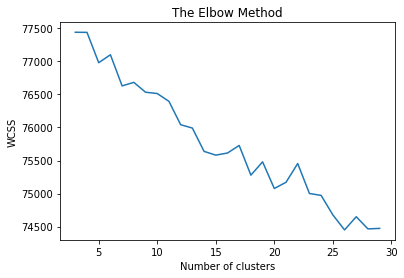

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(3,30):
    kM = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=20)
    kM.fit(vector)
    wcss.append(kM.inertia_)
plt.plot(range(3,30),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()